## Шаг 1: Загрузка и предобработка данных

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Загрузка
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Проверим пропуски
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


## Шаг 2: Разделение выборки

In [2]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Шаг 3: Обучение моделей

**Логистическая регрессия:**

In [3]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

**SVM:**

In [4]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)


SVR()

**DecisionTree**

In [5]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

## Шаг 4: Оценка моделей

In [6]:
from sklearn.metrics import mean_absolute_error, r2_score

models = {
    'Linear Regression': lin_reg,
    'SVR': svr,
    'Decision Tree': tree_reg
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: MAE = {mae:.2f}, R² = {r2:.2f}")


Linear Regression: MAE = 0.53, R² = 0.60
SVR: MAE = 0.87, R² = -0.03
Decision Tree: MAE = 0.47, R² = 0.60


## Шаг 5: Важность признаков + визуализация дерева

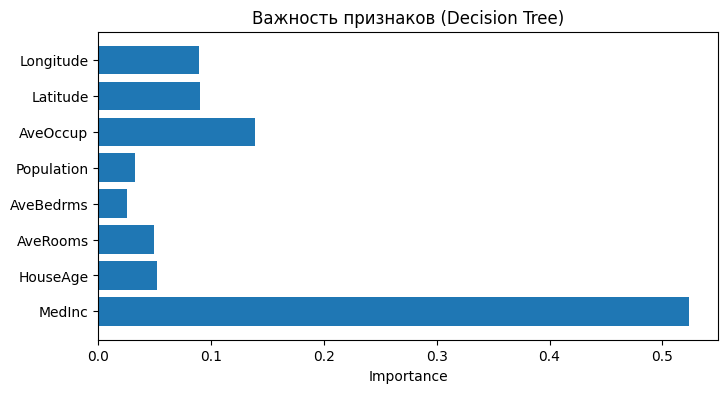

In [7]:
import matplotlib.pyplot as plt

importances = tree_reg.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 4))
plt.barh(feature_names, importances)
plt.title('Важность признаков (Decision Tree)')
plt.xlabel('Importance')
plt.show()


In [9]:
from sklearn.tree import export_text

tree_rules = export_text(tree_reg, feature_names=list(X.columns), max_depth=3)
print(tree_rules)


|--- MedInc <= 5.03
|   |--- MedInc <= 3.07
|   |   |--- AveRooms <= 4.20
|   |   |   |--- AveOccup <= 2.44
|   |   |   |   |--- truncated branch of depth 21
|   |   |   |--- AveOccup >  2.44
|   |   |   |   |--- truncated branch of depth 29
|   |   |--- AveRooms >  4.20
|   |   |   |--- MedInc <= 2.40
|   |   |   |   |--- truncated branch of depth 27
|   |   |   |--- MedInc >  2.40
|   |   |   |   |--- truncated branch of depth 24
|   |--- MedInc >  3.07
|   |   |--- AveOccup <= 2.35
|   |   |   |--- HouseAge <= 24.50
|   |   |   |   |--- truncated branch of depth 22
|   |   |   |--- HouseAge >  24.50
|   |   |   |   |--- truncated branch of depth 23
|   |   |--- AveOccup >  2.35
|   |   |   |--- MedInc <= 4.12
|   |   |   |   |--- truncated branch of depth 31
|   |   |   |--- MedInc >  4.12
|   |   |   |   |--- truncated branch of depth 25
|--- MedInc >  5.03
|   |--- MedInc <= 6.87
|   |   |--- AveOccup <= 2.67
|   |   |   |--- HouseAge <= 19.50
|   |   |   |   |--- truncated branch